In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import urllib.request, urllib.parse, urllib.error


url = "https://data.enedis.fr/explore/dataset/consommation-electrique-par-secteur-dactivite-commune/download/?format=csv&refine.annee=2016&timezone=Europe/Berlin&use_labels_for_header=true"
file_name ="consommation-electrique-par-secteur-dactivite-commune_2016.csv"

print("downloading with urllib, first file")
urllib.request.urlretrieve(url, file_name)

local_filename, headers = urllib.request.urlretrieve(url)
html = open(local_filename)
print("Done !\n")

url2 = "https://data.enedis.fr/explore/dataset/consommation-electrique-par-secteur-dactivite-commune/download/?format=csv&timezone=Europe/Berlin&use_labels_for_header=true"
file_name2 ="consommation-electrique-par-secteur-dactivite-commune_all.csv"

print("downloading with urllib second file")
urllib.request.urlretrieve(url2, file_name2)

local_filename2, headers2 = urllib.request.urlretrieve(url2)
html = open(local_filename2)
print("Done !\n")



downloading with urllib, first file
Done !

downloading with urllib second file
Done !



In [2]:
df =pd.read_csv("consommation-electrique-par-secteur-dactivite-commune_2016.csv", sep=";", encoding = 'utf8', low_memory=False)
df2 =pd.read_csv("consommation-electrique-par-secteur-dactivite-commune_all.csv", sep=";", encoding = 'utf8', low_memory=False)

In [3]:
df.dtypes

Année                                       int64
Nom commune                                object
Code commune                                int64
Nom EPCI                                   object
Code EPCI                                  object
Type EPCI                                  object
Nom département                            object
Code département                            int64
Nom région                                 object
Code région                                 int64
Nb sites Résidentiel                      float64
Conso totale Résidentiel (MWh)            float64
Conso moyenne Résidentiel (MWh)           float64
Nb sites Professionnel                    float64
Conso totale Professionnel (MWh)          float64
Conso moyenne Professionnel (MWh)         float64
Nb sites Agriculture                        int64
Conso totale Agriculture (MWh)            float64
Nb sites Industrie                          int64
Conso totale Industrie (MWh)              float64


In [4]:
df[df['Nb sites Industrie']>df['Nb sites Industrie'].mean()]

,Année,Nom commune,Code commune,Nom EPCI,Code EPCI,Type EPCI,Nom département,Code département,Nom région,Code région,...,Résidences principales avant 1919,Résidences principales de 1919 à 1945,Résidences principales de 1946 à 1970,Résidences principales de 1971 à 1990,Résidences principales de 1991 à 2005,Résidences principales de 2006 à 2010,Résidences principales après 2011,Taux de chauffage électrique,Geo Shape,Geo Point 2D
4,2016,Lapte,43114,CC des Sucs,244301016,CC,Haute-Loire,43,Auvergne-Rhône-Alpes,84,...,27.840909,10.795455,10.085227,22.585227,16.477273,7.528409,4.687500,17.187500,"{""type"": ""Polygon"", ""coordinates"": [[[4.289360...","45.1795870032, 4.2350240441"
8,2016,La Verpillière,38537,CA Porte de l'Isère (C.A.P.I),243800604,CA,Isère,38,Auvergne-Rhône-Alpes,84,...,7.276031,3.975480,18.138714,43.879059,12.164791,13.343816,1.222109,32.336548,"{""type"": ""Polygon"", ""coordinates"": [[[5.151705...","45.6375869861, 5.14842827027"
18,2016,Solliès-Pont,83130,CC de la Vallée du Gapeau,248300410,CC,Var,83,Provence-Alpes-Côte d'Azur,93,...,16.142639,5.523850,11.674334,42.076314,20.076923,3.232579,1.273361,57.005037,"{""type"": ""Polygon"", ""coordinates"": [[[6.035295...","43.1909136269, 6.06355075163"
20,2016,Chevilly,45093,CC de la Beauce Loirétaine,200035764,CC,Loiret,45,Centre-Val de Loire,24,...,14.794641,6.381200,16.426456,42.618261,11.829783,4.458951,3.490709,37.991975,"{""type"": ""Polygon"", ""coordinates"": [[[1.865892...","48.0300136635, 1.89388202078"
25,2016,Decazeville,12089,CC du Bassin de Decazeville Aubin,241200724,CC,Aveyron,12,Occitanie,76,...,19.778686,8.974704,35.631434,27.950776,4.529910,3.134490,0.000000,21.759395,"{""type"": ""Polygon"", ""coordinates"": [[[2.249839...","44.5668430861, 2.25289908108"
28,2016,Sommevoire,52479,CC du Pays du Der,245200415,CC,Haute-Marne,52,Grand-Est,44,...,38.698614,7.191767,11.643821,21.575334,15.753407,2.054810,3.082248,12.671226,"{""type"": ""Polygon"", ""coordinates"": [[[4.881782...","48.4100734828, 4.8331473757"
57,2016,Montauban-de-Bretagne,35184,CC de Saint-Méen Montauban,200038990,CC,Ille-et-Vilaine,35,Bretagne,53,...,10.426084,3.916118,14.637051,30.691939,24.814670,13.507109,2.007031,34.120224,"{""type"": ""Polygon"", ""coordinates"": [[[-2.00057...","48.2027788606, -2.06541586556"
58,2016,Mauzé-sur-le-Mignon,79170,CA du Niortais,200041317,CA,Deux-Sèvres,79,Nouvelle Aquitaine,75,...,28.500414,7.373654,16.404308,23.446562,14.747307,7.125104,2.402651,51.864126,"{""type"": ""Polygon"", ""coordinates"": [[[-0.68633...","46.1920766596, -0.644993707129"
59,2016,Bourganeuf,23030,CC Bourganeuf Royère de Vassivière,242320034,CC,Creuse,23,Nouvelle Aquitaine,75,...,24.477861,16.290727,29.239766,25.313283,2.506266,1.420217,0.751880,16.708438,"{""type"": ""Polygon"", ""coordinates"": [[[1.712814...","45.9493923158, 1.74870475933"
64,2016,Rion-des-Landes,40243,CC du Pays Tarusate,244000766,CC,Landes,40,Nouvelle Aquitaine,75,...,13.237925,14.311270,17.978533,25.223614,13.685152,11.896243,3.667263,29.874776,"{""type"": ""Polygon"", ""coordinates"": [[[-0.91622...","43.934995238, -0.933880459489"


In [5]:
distinct_commune = df['Nom commune'].unique()
NB_distinct_commune = len(distinct_commune)
NB_distinct_commune

30921

In [6]:
distinct_département = df['Nom département'].unique()
NB_distinct_département = len(distinct_département)
NB_distinct_département

94

In [7]:
distinct_region = df['Nom région'].unique()
NB_distinct_region = len(distinct_region)
NB_distinct_region

12

In [8]:
df_resi = df[['Nb sites Résidentiel','Nom région','Conso totale Résidentiel (MWh)','Conso moyenne Résidentiel (MWh)']]

In [9]:
df_resi_sum = df_resi.groupby(['Nom région']).sum()

In [10]:
df_resi_sum

,Nb sites Résidentiel,Conso totale Résidentiel (MWh),Conso moyenne Résidentiel (MWh)
Nom région,,,
Auvergne-Rhône-Alpes,2400704.0,1.291921e+07,21116.325878
Bourgogne-Franche-Comté,945481.0,5.100517e+06,16560.138015
Bretagne,1169080.0,6.079378e+06,6794.832683
Centre-Val de Loire,782084.0,5.025665e+06,10394.352455
Grand-Est,1176818.0,6.654068e+06,22379.334663
Hauts-de-France,1277284.0,7.042180e+06,17230.909397
Normandie,971912.0,6.103786e+06,16724.734023
Nouvelle Aquitaine,1896461.0,1.060193e+07,21501.658350
Occitanie,1632525.0,8.895204e+06,20328.632582


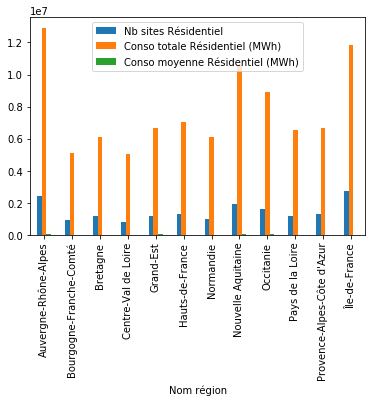

In [11]:
df_resi_sum.plot.bar()

In [12]:
df_conso = df[['Conso totale Industrie (MWh)','Nom région','Conso totale Résidentiel (MWh)','Conso totale Professionnel (MWh)','Conso totale Tertiaire (MWh)']]

In [13]:
df_conso_sum = df_conso.groupby(['Nom région']).sum()

In [14]:
df_conso_sum

,Conso totale Industrie (MWh),Conso totale Résidentiel (MWh),Conso totale Professionnel (MWh),Conso totale Tertiaire (MWh)
Nom région,,,,
Auvergne-Rhône-Alpes,1.034118e+07,1.291921e+07,3.293859e+06,1.156847e+07
Bourgogne-Franche-Comté,4.015697e+06,5.100517e+06,1.277748e+06,3.594888e+06
Bretagne,4.168411e+06,6.079378e+06,1.685536e+06,4.340179e+06
Centre-Val de Loire,3.015246e+06,5.025665e+06,1.001539e+06,3.267889e+06
Grand-Est,6.392799e+06,6.654068e+06,1.580256e+06,4.917434e+06
Hauts-de-France,7.268205e+06,7.042180e+06,1.609612e+06,7.278560e+06
Normandie,4.707160e+06,6.103786e+06,1.350920e+06,4.418963e+06
Nouvelle Aquitaine,4.662306e+06,1.060193e+07,2.430190e+06,7.584084e+06
Occitanie,3.519432e+06,8.895204e+06,2.059659e+06,7.668588e+06


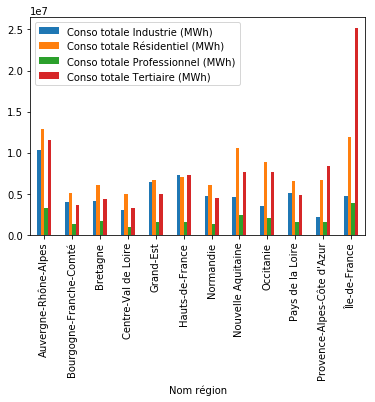

In [15]:
df_conso_sum.plot.bar()

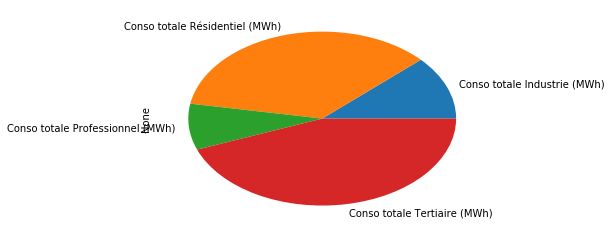

In [16]:
df_info_region = df[['Conso totale Industrie (MWh)','Conso totale Résidentiel (MWh)','Conso totale Professionnel (MWh)','Conso totale Tertiaire (MWh)']]
df_info_region[df['Nom région']=='Provence-Alpes-Côte d\'Azur'].sum().plot.pie()

In [17]:
df_resi2 = df2[['Année','Nb sites Résidentiel','Conso totale Résidentiel (MWh)','Conso moyenne Résidentiel (MWh)']]
df_resi2[df2['Nom région']=='Provence-Alpes-Côte d\'Azur'].groupby(['Année']).sum()

,Nb sites Résidentiel,Conso totale Résidentiel (MWh),Conso moyenne Résidentiel (MWh)
Année,,,
2011,2164960.0,1.110526e+07,4893.159424
2012,2161045.0,1.154775e+07,5100.561315
2013,2109980.0,1.148600e+07,5161.530128
2014,2021635.0,9.967249e+06,4590.059568
2015,2135763.0,1.029080e+07,4517.209513
2016,1266785.0,6.673167e+06,4418.713182


In [18]:
df_indu2 = df2[['Année','Nb sites Industrie','Conso totale Industrie (MWh)']]
df_indu2[df2['Nom région']=='Provence-Alpes-Côte d\'Azur'].groupby(['Année']).sum()

,Nb sites Industrie,Conso totale Industrie (MWh)
Année,,
2011,4634,2.350212e+06
2012,5021,2.361689e+06
2013,5412,2.350022e+06
2014,5471,2.265527e+06
2015,5529,2.288042e+06
2016,5656,2.227017e+06


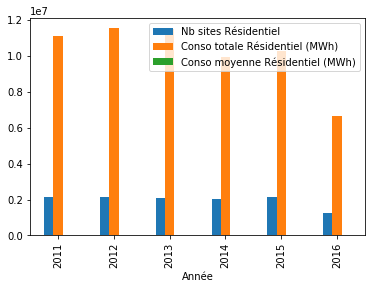

In [19]:
df_resi2[df2['Nom région']=='Provence-Alpes-Côte d\'Azur'].groupby(['Année']).sum().plot.bar()

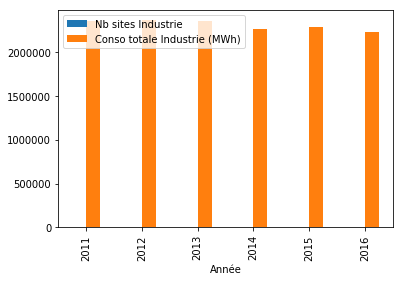

In [20]:
df_indu2[df2['Nom région']=='Provence-Alpes-Côte d\'Azur'].groupby(['Année']).sum().plot.bar()

In [21]:
df_departement = df[['Nom région','Nom département','Conso totale Industrie (MWh)','Conso totale Résidentiel (MWh)','Conso totale Professionnel (MWh)','Conso totale Tertiaire (MWh)']]
df_departement[df_departement['Nom région']== 'Provence-Alpes-Côte d\'Azur'].groupby(['Nom département']).sum()

,Conso totale Industrie (MWh),Conso totale Résidentiel (MWh),Conso totale Professionnel (MWh),Conso totale Tertiaire (MWh)
Nom département,,,,
Alpes-Maritimes,3.547166e+05,9.058248e+05,179804.476128,2.180870e+06
Alpes-de-Haute-Provence,6.025375e+04,4.159268e+05,99833.217648,2.602353e+05
Bouches-du-Rhône,1.149966e+06,3.083373e+06,914507.432953,3.174763e+06
Hautes-Alpes,4.516199e+04,3.171260e+05,99017.788230,3.546177e+05
Var,2.172867e+05,1.172976e+06,177189.973981,1.498483e+06
Vaucluse,3.996319e+05,7.779405e+05,139091.864360,8.546993e+05


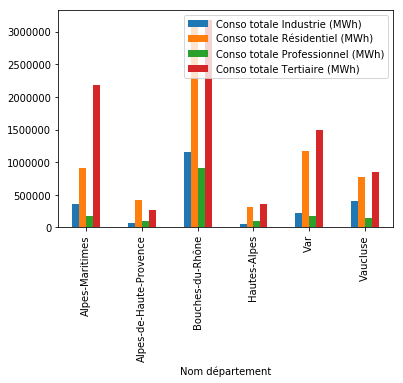

In [22]:
df_departement[df_departement['Nom région']== 'Provence-Alpes-Côte d\'Azur'].groupby(['Nom département']).sum().plot.bar()

In [23]:
df_ville = df[['Nom département','Nom commune','Conso totale Industrie (MWh)','Conso totale Résidentiel (MWh)','Conso totale Professionnel (MWh)','Conso totale Tertiaire (MWh)']]
df_ville_sum = df_ville[df_ville['Nom département']== 'Vaucluse'].groupby(['Nom commune', 'Nom département']).sum()
df_ville_sum

,,Conso totale Industrie (MWh),Conso totale Résidentiel (MWh),Conso totale Professionnel (MWh),Conso totale Tertiaire (MWh)
Nom commune,Nom département,,,,
Althen-des-Paluds,Vaucluse,778.410696,9432.619489,1012.606393,1960.186919
Ansouis,Vaucluse,266.994833,5286.432485,788.857785,0.000000
Apt,Vaucluse,18346.956425,0.000000,0.000000,16678.287572
Aubignan,Vaucluse,7971.053217,18507.579102,1922.266189,2844.815967
Aurel,Vaucluse,0.000000,892.585254,123.106103,76.562123
Auribeau,Vaucluse,0.000000,0.000000,0.000000,0.000000
Avignon,Vaucluse,42065.213986,0.000000,0.000000,211926.366335
Beaumes-de-Venise,Vaucluse,1813.108216,9337.961545,2319.555745,1108.039709
Beaumettes,Vaucluse,0.000000,1615.642309,481.193912,274.465750


In [24]:
df_ville_sum[df_ville_sum['Conso totale Industrie (MWh)']<df['Conso totale Industrie (MWh)'].mean()]

,,Conso totale Industrie (MWh),Conso totale Résidentiel (MWh),Conso totale Professionnel (MWh),Conso totale Tertiaire (MWh)
Nom commune,Nom département,,,,
Althen-des-Paluds,Vaucluse,778.410696,9432.619489,1012.606393,1960.186919
Ansouis,Vaucluse,266.994833,5286.432485,788.857785,0.000000
Aurel,Vaucluse,0.000000,892.585254,123.106103,76.562123
Auribeau,Vaucluse,0.000000,0.000000,0.000000,0.000000
Beaumes-de-Venise,Vaucluse,1813.108216,9337.961545,2319.555745,1108.039709
Beaumettes,Vaucluse,0.000000,1615.642309,481.193912,274.465750
Beaumont-de-Pertuis,Vaucluse,8.671823,4051.873367,790.085220,98.148234
Beaumont-du-Ventoux,Vaucluse,187.790313,1153.952617,390.621110,399.042205
Blauvac,Vaucluse,0.000000,1781.131954,188.445897,308.249810
